<a href="https://colab.research.google.com/github/LeTam0101/TRI-TUE-NHAN-TAO/blob/main/C%C3%A0_chua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [76]:
%cd /content/drive/MyDrive/Colab Notebooks/Cuối kì/Ca chua

/content/drive/MyDrive/Colab Notebooks/Cuối kì/Ca chua


In [77]:
# Tạo ra class ImageDataGenerator để chỉnh ảnh 
train_datagen=ImageDataGenerator(rescale=1/255, 
                                 shear_range=0.2, 
                                 zoom_range=0.2, 
                                 horizontal_flip=True)

In [78]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_67 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_69 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                

In [79]:
#Tạo bộ dữ liệu
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Cuối kì/Ca chua/Train',
                                               target_size=(150,150), 
                                               batch_size=32, 
                                               class_mode='categorical')

validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Cuối kì/Ca chua/Validation',
                                             target_size=(150,150),
                                             batch_size=32, 
                                             class_mode='categorical')

training_set.class_indices
validation.class_indices

Found 471 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


{'Ca chua': 0, 'Ca phao': 1, 'Ca rot': 2, 'Ca tim': 3, 'Cu cai': 4}

In [80]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,
                  epochs=20,
                  batch_size=128,
                  verbose=1, 
                  validation_data=validation, 
                  callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/20
15/15 [==============================] - 11s 441ms/step - loss: 3.9063 - accuracy: 0.2314 - val_loss: 1.5765 - val_accuracy: 0.3600
Epoch 2/20
15/15 [==============================] - 10s 696ms/step - loss: 1.3496 - accuracy: 0.4480 - val_loss: 0.8812 - val_accuracy: 0.7200
Epoch 3/20
15/15 [==============================] - 5s 309ms/step - loss: 0.7834 - accuracy: 0.6794 - val_loss: 0.5585 - val_accuracy: 0.7200
Epoch 4/20
15/15 [==============================] - 4s 276ms/step - loss: 0.7197 - accuracy: 0.7346 - val_loss: 0.4853 - val_accuracy: 0.7600
Epoch 5/20
15/15 [==============================] - 6s 374ms/step - loss: 0.7371 - accuracy: 0.6794 - val_loss: 0.7991 - val_accuracy: 0.7200
Epoch 6/20
15/15 [==============================] - 4s 279ms/step - loss: 0.5567 - accuracy: 0.7622 - val_loss: 0.4862 - val_accuracy: 0.7200
Epoch 7/20
15/15 [==============================] - 4s 278ms/step - loss: 0.6160 - accuracy: 0.7410 - val_loss: 0.4720 - val_accuracy: 0.8000
Epoc

In [81]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.2744983732700348
Train Accuracy 0.8747345805168152


<function matplotlib.pyplot.show(close=None, block=None)>

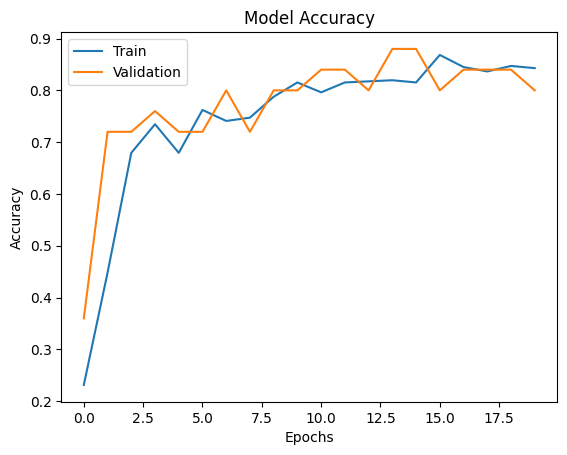

In [82]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [83]:
# Lưu lại
model.save("Ca chua.h5")

In [84]:
# Tải mô hình 
model_CNN=load_model("Ca chua.h5")

1/1 [==============================] - 0s 110ms/step
('Ca chua', Loai qua        Ca chua
Nhan dang    La ca chua
Name: Ca chua, dtype: object)


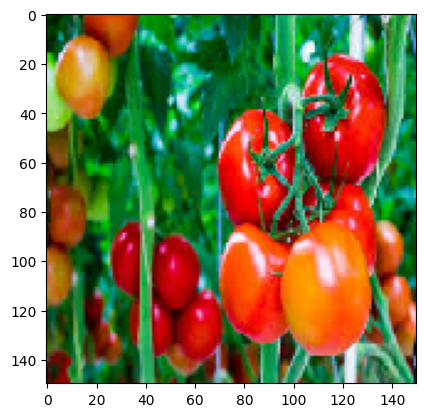

1/1 [==============================] - 0s 22ms/step
('Ca chua', Loai qua        Ca chua
Nhan dang    La ca chua
Name: Ca chua, dtype: object)


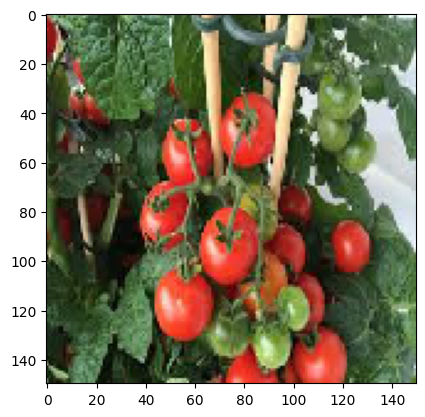

1/1 [==============================] - 0s 41ms/step
('Ca chua', Loai qua        Ca chua
Nhan dang    La ca chua
Name: Ca chua, dtype: object)


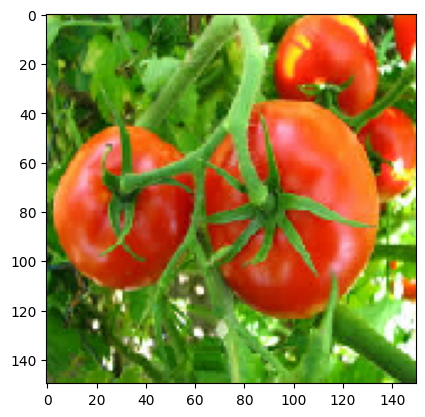

1/1 [==============================] - 0s 35ms/step
('Ca rot', Loai qua               Ca rot
Nhan dang    Khong la ca chua
Name: Ca rot, dtype: object)


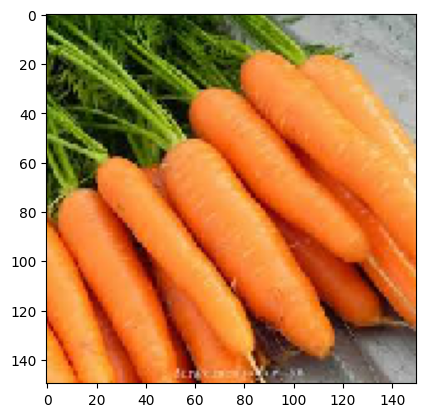

1/1 [==============================] - 0s 31ms/step
('Ca rot', Loai qua               Ca rot
Nhan dang    Khong la ca chua
Name: Ca rot, dtype: object)


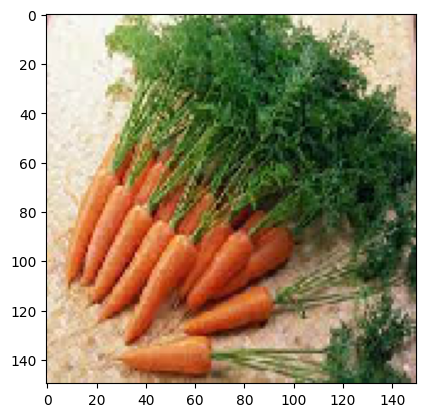

1/1 [==============================] - 0s 63ms/step
('Cu cai', Loai qua               Cu cai
Nhan dang    Khong la ca chua
Name: Cu cai, dtype: object)


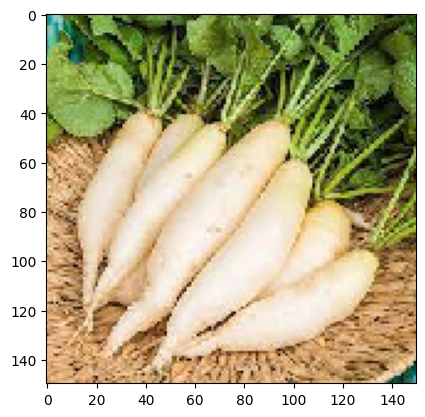

1/1 [==============================] - 0s 33ms/step
('Cu cai', Loai qua               Cu cai
Nhan dang    Khong la ca chua
Name: Cu cai, dtype: object)


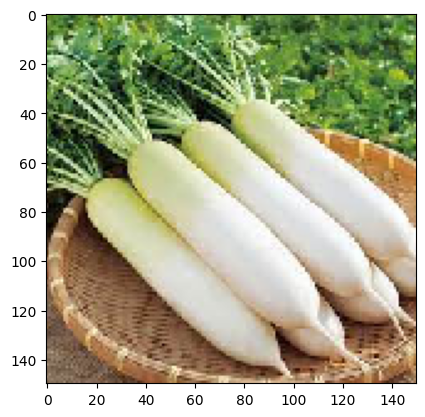

1/1 [==============================] - 0s 27ms/step
('Ca tim', Loai qua               Ca tim
Nhan dang    Khong la ca chua
Name: Ca tim, dtype: object)


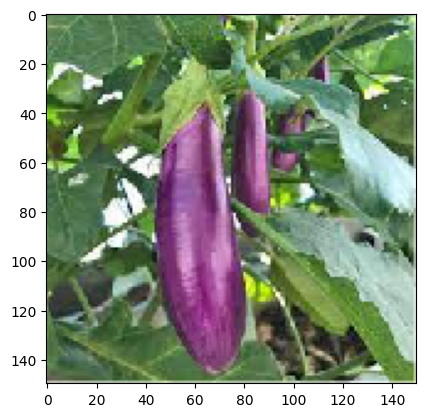

1/1 [==============================] - 0s 47ms/step
('Ca tim', Loai qua               Ca tim
Nhan dang    Khong la ca chua
Name: Ca tim, dtype: object)


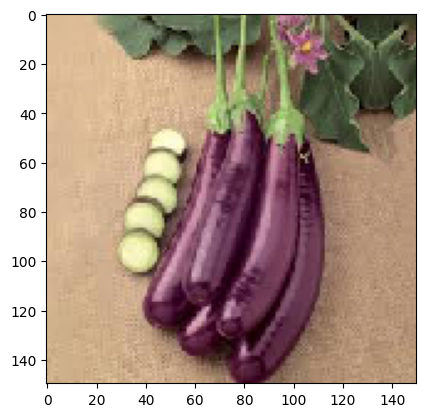

1/1 [==============================] - 0s 61ms/step
('Cu cai', Loai qua               Cu cai
Nhan dang    Khong la ca chua
Name: Cu cai, dtype: object)


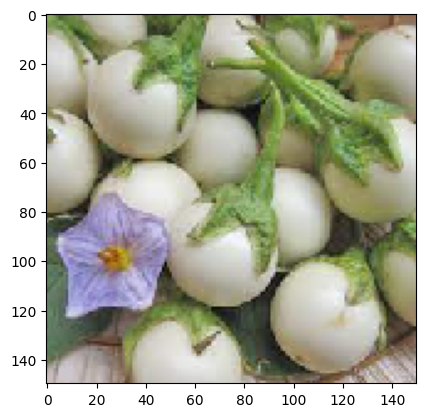

1/1 [==============================] - 0s 44ms/step
('Ca phao', Loai qua              Ca phao
Nhan dang    Khong la ca chua
Name: Ca phao, dtype: object)


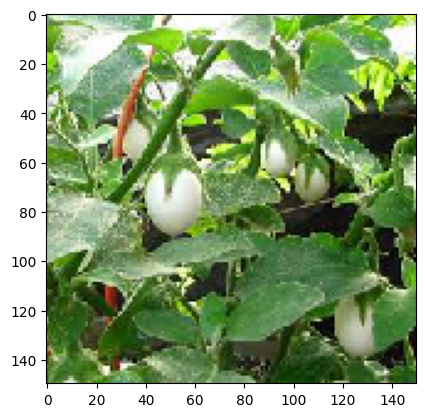

In [85]:
import pandas as pd
url = '/content/Cachua.csv'
dataframe = pd.read_csv(url)
dataframe = dataframe.set_index(dataframe['Loai qua'])
Test = "/content/drive/MyDrive/Colab Notebooks/Cuối kì/Ca chua/Test"
for i in os.listdir(Test):
  img=load_img(Test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Ca chua', dataframe.loc['Ca chua']
  if round(result[0][1])==1:
    prediction='Ca phao', dataframe.loc['Ca phao']
  if round(result[0][2])==1:
    prediction='Ca rot', dataframe.loc['Ca rot']
  if round(result[0][3])==1:
    prediction='Ca tim', dataframe.loc['Ca tim']
  if round(result[0][4])==1:
    prediction='Cu cai', dataframe.loc['Cu cai']
  print(prediction)
  plt.show()